In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('./kathmandu_house_price_dataset.csv')
df.head()

,area_sqft,num_rooms,num_bathrooms,floor_level,location_rating,price_lakh_npr
0,1926,3,2,1,5,297.64
1,1660,5,2,1,7,293.49
2,1930,2,3,3,7,317.76
3,1895,2,2,1,8,308.91
4,1844,3,1,2,6,283.03


In [3]:
df.size

3000

In [4]:
df.shape

(500, 6)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price_lakh_npr'])
y = df['price_lakh_npr']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
x_scaled_test = scaler.transform(X_test)


In [6]:
# first training simple linear regression model

from sklearn.linear_model import LinearRegression

simple_model = LinearRegression()
simple_model.fit(X_scaled_train, y_train)



LinearRegression()

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = simple_model.predict(x_scaled_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 103.35272559267254
R^2 Score: 0.948628120340733


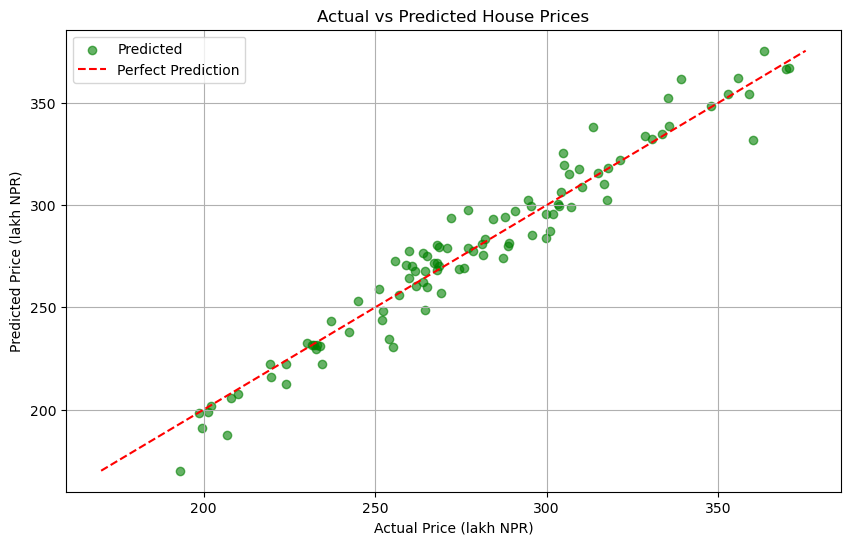

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot predicted vs actual values 
plt.scatter(y_pred, y_test, color='green', alpha=0.6, label='Predicted')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Price (lakh NPR)')
plt.ylabel('Predicted Price (lakh NPR)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid()
plt.show()

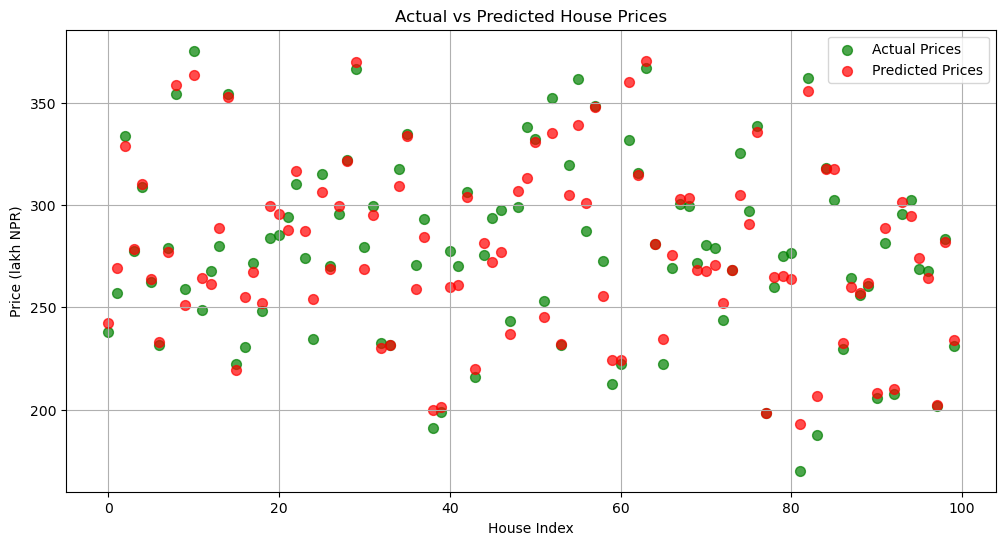

In [43]:
plt.figure(figsize=(12, 6))

# Create x-axis positions for each house
x_pos = range(len(y_test))

plt.scatter(x_pos, y_test, color='green', alpha=0.7, label='Actual Prices', s=50)
plt.scatter(x_pos, y_pred, color='red', alpha=0.7, label='Predicted Prices', s=50)

plt.xlabel('House Index')
plt.ylabel('Price (lakh NPR)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid()
plt.show()

In [9]:
new_data = {
    'area_sqft': [1214, 1805, 934, 1623, 1411, 1118, 1962, 1534, 1042, 1875,
                  1650, 899, 1238, 1317, 1784, 1163, 1372, 1550, 1699, 1087],
    'num_rooms': [3, 4, 2, 3, 3, 3, 5, 4, 2, 3,
                  4, 2, 3, 3, 4, 2, 3, 4, 4, 2],
    'num_bathrooms': [1, 2, 1, 2, 2, 1, 3, 2, 1, 2,
                      3, 1, 2, 2, 3, 1, 2, 2, 2, 1],
    'floor_level': [1, 2, 1, 3, 2, 1, 2, 2, 1, 3,
                    1, 1, 2, 1, 2, 2, 1, 3, 2, 1],
    'location_rating': [7, 9, 6, 8, 6, 5, 10, 9, 5, 8,
                        7, 5, 6, 7, 9, 6, 8, 7, 8, 5],
    'price_lakh_npr': [219.86, 295.57, 173.27, 268.11, 233.85, 194.42, 326.18, 274.63, 178.03, 292.42,
                       277.16, 161.72, 219.64, 231.28, 306.93, 197.42, 247.13, 266.18, 281.17, 178.38]
}

new_df = pd.DataFrame(new_data)
new_df

,area_sqft,num_rooms,num_bathrooms,floor_level,location_rating,price_lakh_npr
0,1214,3,1,1,7,219.86
1,1805,4,2,2,9,295.57
2,934,2,1,1,6,173.27
3,1623,3,2,3,8,268.11
4,1411,3,2,2,6,233.85
5,1118,3,1,1,5,194.42
6,1962,5,3,2,10,326.18
7,1534,4,2,2,9,274.63
8,1042,2,1,1,5,178.03
9,1875,3,2,3,8,292.42


price_lakh_npr': [219.86, 295.57, 173.27, 268.11, 233.85, 194.42, 326.18, 274.63, 178.03, 292.42,
                       277.16, 161.72, 219.64, 231.28, 306.93, 197.42, 247.13, 266.18, 281.17, 178.38]

In [10]:
X_new = new_df.drop(columns=['price_lakh_npr'])
y_new = new_df['price_lakh_npr'] 
X_new_scaled = scaler.transform(X_new)

y_new_pred = simple_model.predict(X_new_scaled)
y_new_pred

mse = mean_squared_error(y_new, y_new_pred)
r2 = r2_score(y_new, y_new_pred)
print(f'Mean Squared Error for new data: {mse}')
print(f'R^2 Score for new data: {r2}')

Mean Squared Error for new data: 870.6088353568032
R^2 Score for new data: 0.6260212672732782


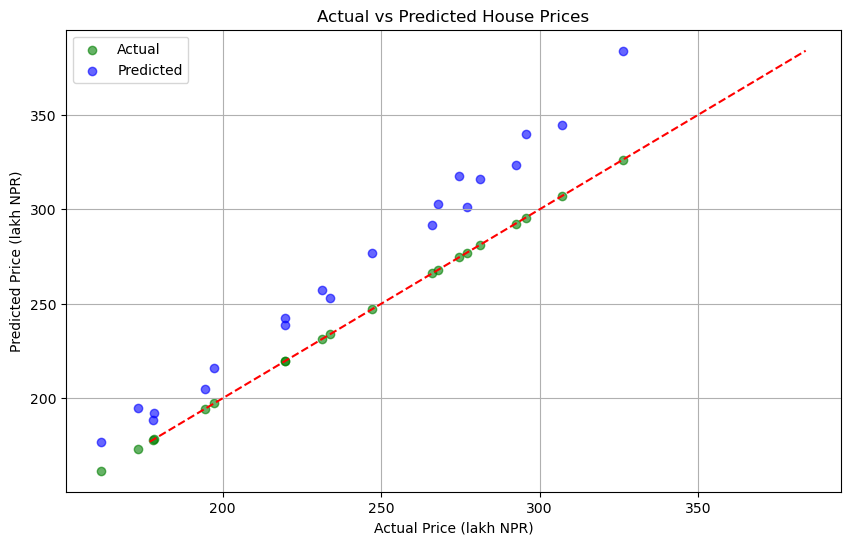

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Predicted values (blue dots)
plt.scatter(y_new, y_new_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_new_pred.min(), y_new_pred.max()], [y_new_pred.min(), y_new_pred.max()], color='red', linestyle='--')
plt.xlabel('Actual Price (lakh NPR)')
plt.ylabel('Predicted Price (lakh NPR)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid()
plt.show()

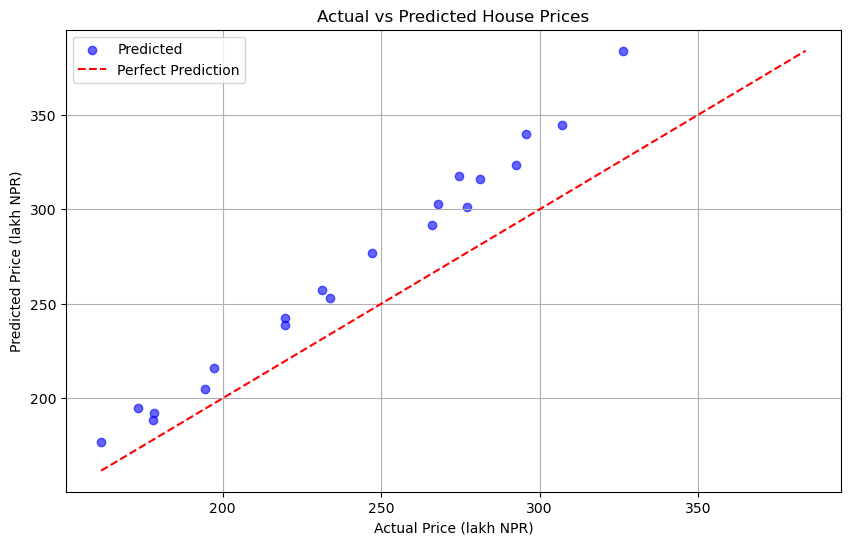

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot predicted vs actual
plt.scatter(y_new, y_new_pred, color='blue', alpha=0.6, label='Predicted')

# Perfect prediction line (y = x)
min_val = min(y_new.min(), y_new_pred.min())
max_val = max(y_new.max(), y_new_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Price (lakh NPR)')
plt.ylabel('Predicted Price (lakh NPR)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid()
plt.show()


In [45]:
#bagging
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['price_lakh_npr'])
y = df['price_lakh_npr']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
x_scaled_test = scaler.transform(X_test)

n = 50
models = []
bootstrap_X = []
bootstrap_y = []

'''
range(len(X)): Creates indices from 0 to length of X
size=len(X): Sample the same number of elements as original dataset
replace=True: Allow sampling the same index multiple times (with replacement)

'''

# creating fockinggg 5 bootstrap samples
for i in range(n):
    bootstrap_indices = np.random.choice(range(len(X_scaled_train)), size=len(X_scaled_train), replace=True)
    x_boot = X_scaled_train[bootstrap_indices]
    y_boot = y_train.iloc[bootstrap_indices]

    bootstrap_X.append(x_boot)
    bootstrap_y.append(y_boot)

    #train model 
    model = LinearRegression()
    model.fit(x_boot, y_boot)
    models.append(model)

    # Example: test on original data and average the predictions
preds = np.zeros(len(X_test))  


for model in models:
    preds += model.predict(x_scaled_test) / len(models)  # average predictions 

        # evaluation 
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

print(f"Model {i+1} - Mean Squared Error: {mse}, R^2 Score: {r2}")


print("Average prediction: ", preds.mean())

Model 50 - Mean Squared Error: 102.9431368465354, R^2 Score: 0.9488317080415477
Average prediction:  277.8724104626202


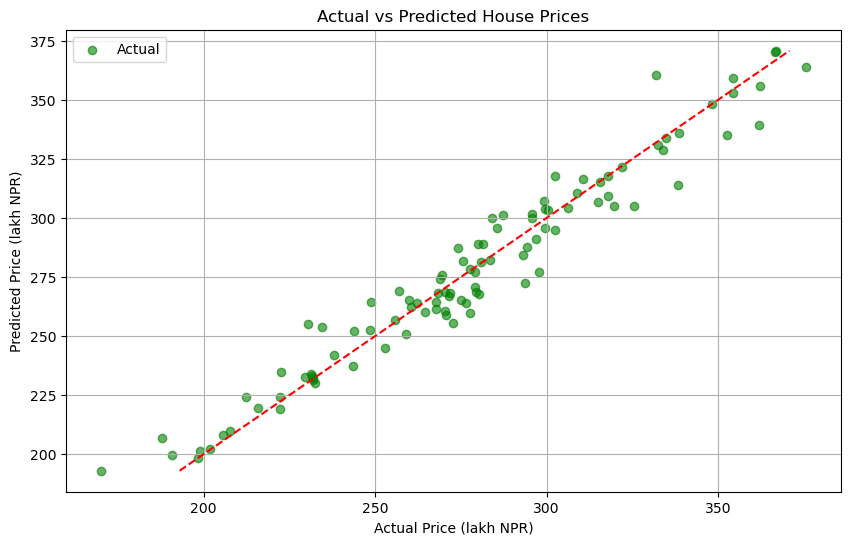

In [ ]:
# visualizing y_test and preds 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Actual values (green dots)
plt.scatter(y_test, preds, color='green', alpha=0.6, label='Actual')
plt.plot([preds.min(), preds.max()], [preds.min(), preds.max()], color='red', linestyle='--')
plt.xlabel('Actual Price (lakh NPR)')
plt.ylabel('Predicted Price (lakh NPR)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid()
plt.show()